<a href="https://colab.research.google.com/github/OmerDiaaeldin/Machine-Learning/blob/main/Canny_Edge_detection_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Canny Edge detection</h1>

<h3>Image preprocessing</h3>

import necessary libraries

In [222]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import convolve

define a mean absolute error function to compare different images

In [223]:
def mae(img1, img2):
  return np.mean(np.abs(img1 - img2))

<h3>convert rgb image to grayscale image</h3>

In [224]:

path = "/content/Strawberry_ice_cream_cone_(5076899310).jpg"
figsize = (240, 20)

def import_img_and_convert_to_grayscale(path = path):
  rgb = image.imread(path)
  display(np.unique(rgb))
  plt.figure(figsize=figsize)
  plt.imshow(rgb)
  plt.show()
  img = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
  return img

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

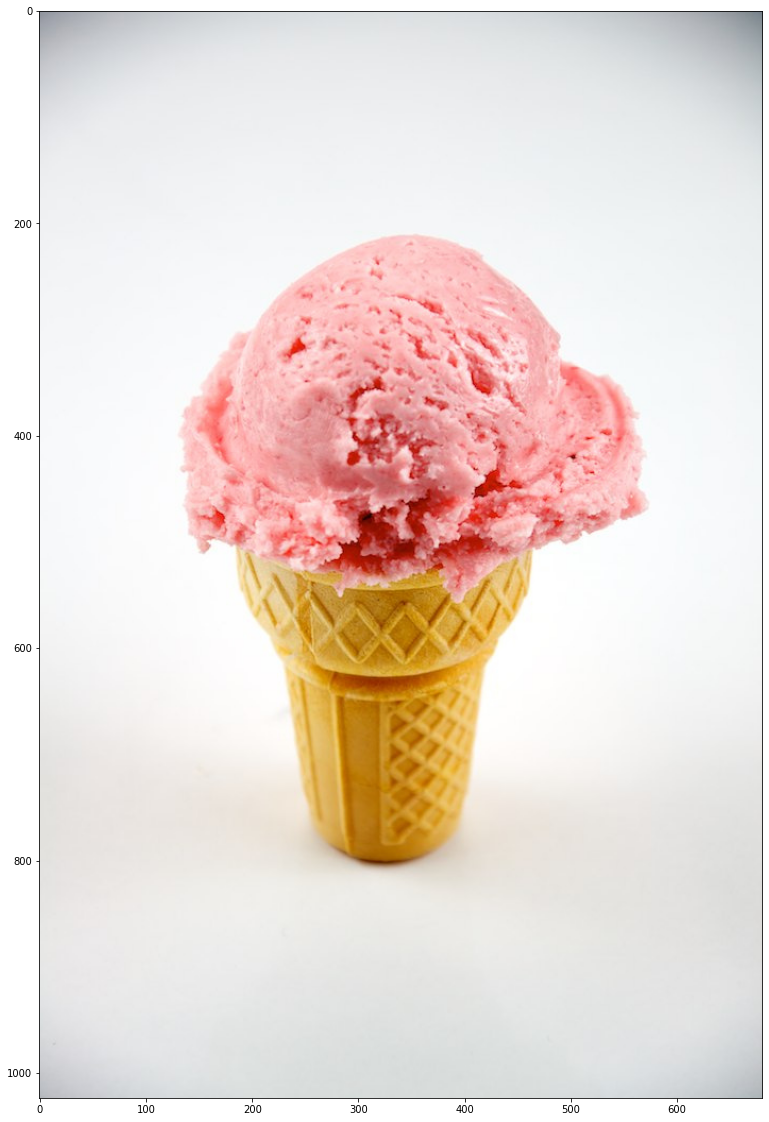

<Figure size 17280x1440 with 0 Axes>

In [225]:
img_gray = import_img_and_convert_to_grayscale();

<h3>blur the image using a differentiated gaussian filter and return the magnitude map and direction map</h3>

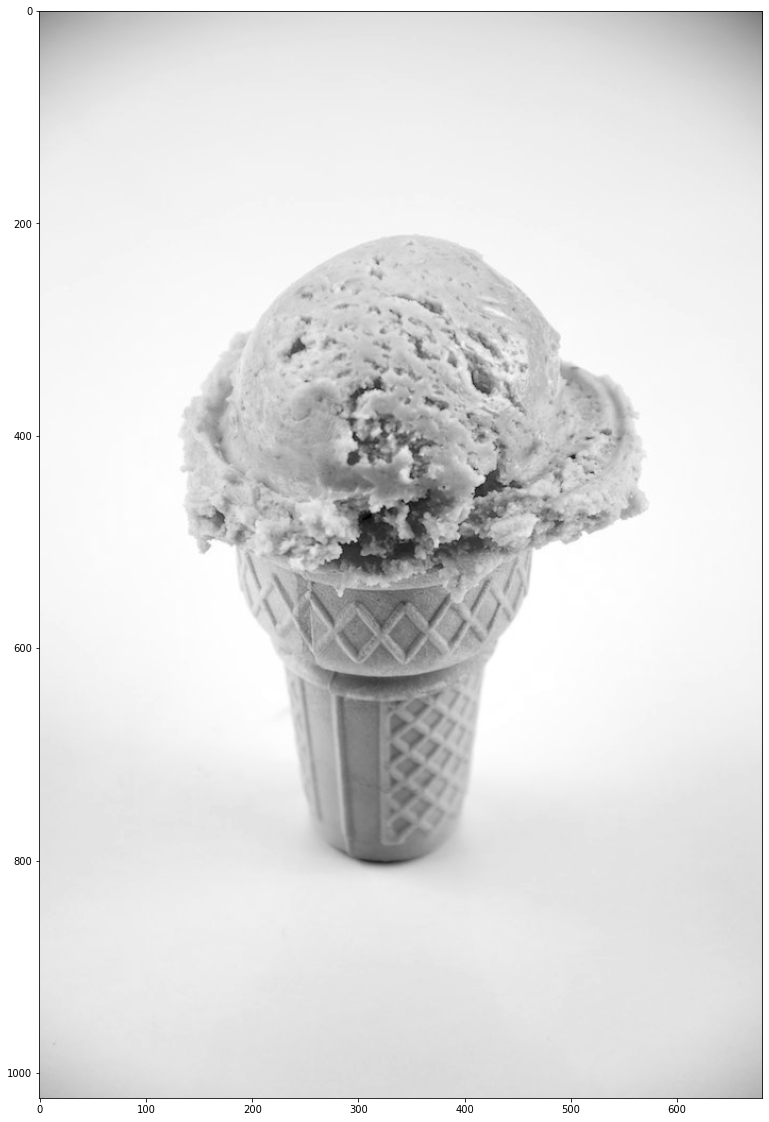

In [239]:
plt.figure(figsize = figsize)
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.show()

In [227]:
kernel = 3
sigma = 1.4

def filter_image(img, kernel=kernel, sigma=sigma): #img-> apply differential of gaussian blur and returns the gradient maps
  size = int(kernel) // 2
  y, x = np.mgrid[-size:size+1, -size:size+1]
  gaussian =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2))))
  n = gaussian.sum()
  filter_x = (-x/sigma**2)*(gaussian)
  filter_y = (-y/sigma**2)*(gaussian)
  Gx = convolve(img, filter_x, mode="reflect")
  Gy = convolve(img, filter_y, mode='reflect')
  plt.figure(figsize=figsize)

  G_mag = np.sqrt(Gx**2+Gy**2)
  G_dir = np.arctan2(Gy,Gx)*(180)/np.pi
  
  return G_mag, G_dir

In [228]:
magnitude_map, direction_map = filter_image(img_gray, kernel, sigma)

<Figure size 17280x1440 with 0 Axes>

round the direction values to 0, 45, 90, or 135 (because each pixel has at most 8 pixels, 2 at each direction)

In [229]:
for row in range(direction_map.shape[0]):
  for column in range(direction_map.shape[1]):
    gradient = abs(direction_map[row][column])
    if(gradient <=22.5):
      direction_map[row][column] = 0
    elif(gradient <=67.5):
      direction_map[row][column] = 45
    elif(gradient <=112.5):
      direction_map[row][column] = 90
    elif(gradient <=157.5):
      direction_map[row][column] = 135
    elif(gradient <=180):
      direction_map[row][column] = 0

<h3>Non-max suppression</h3>

In [230]:
for row in range(direction_map.shape[0]):
  for column in range(direction_map.shape[1]):
    mag = magnitude_map[row][column]
    dir = direction_map[row][column]

    if(dir == 0):
      c = 1
      s = 0
    elif(dir == 45.0):
      c = 1
      s = 1
    elif(dir == 90):
      c = 0
      s = 1
    elif(dir == 135):
      c = -1
      s = 1

    x2 = row + c
    y2 = column + s
    x1 = row - c
    y1 = column - s

    try:
      neighbour = magnitude_map[x2][y2]
      if(neighbour > mag):
        magnitude_map[row][column] = 0
    except:
      pass
    
    try:
      neighbour = magnitude_map[x1][y1]
      if(neighbour > mag):
        magnitude_map[row][column] = 0
    except:
      pass
      


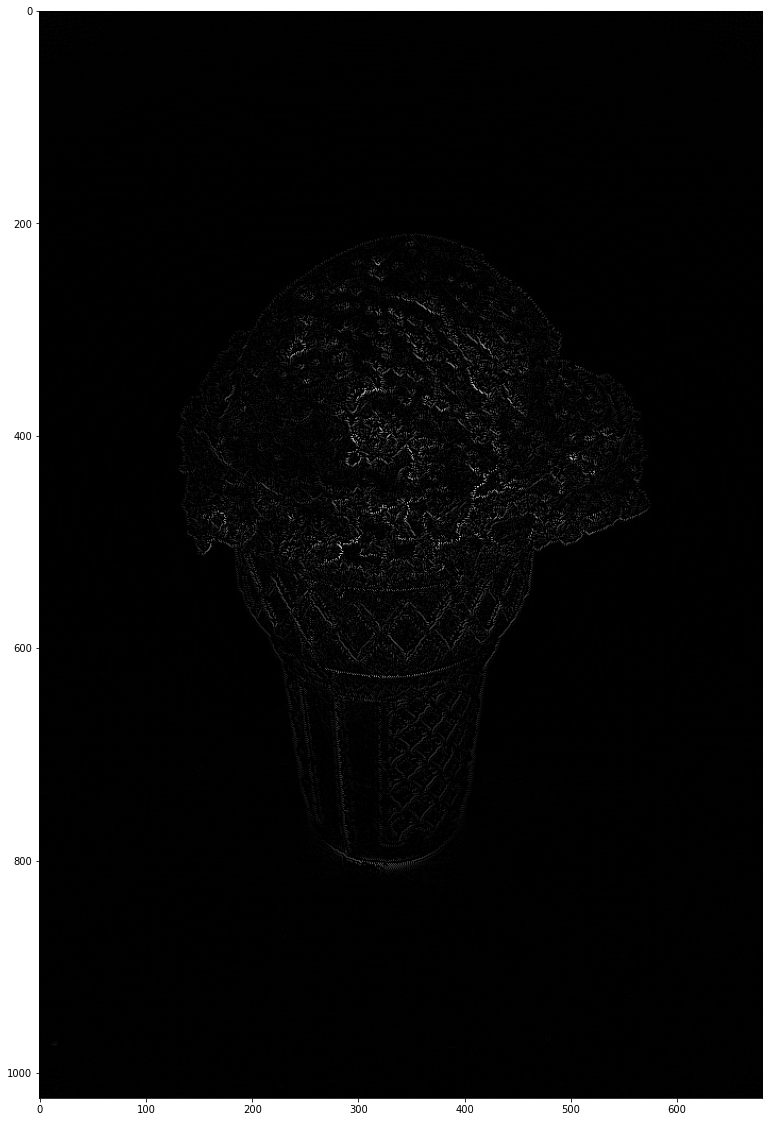

In [231]:
plt.figure(figsize=figsize)
plt.imshow(magnitude_map, cmap=plt.get_cmap("gray"))

<h3>Double threshold</h3>

In [232]:
strong_threshold = 17
weak_threshold = 10

def double_threshold(img, strong=strong_threshold,weak=weak_threshold):
  X = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      x = img[i][j]
      if(x >= strong):
        X[i][j] = 255
      elif(x>=weak):
        X[i][j] = 25

  return X

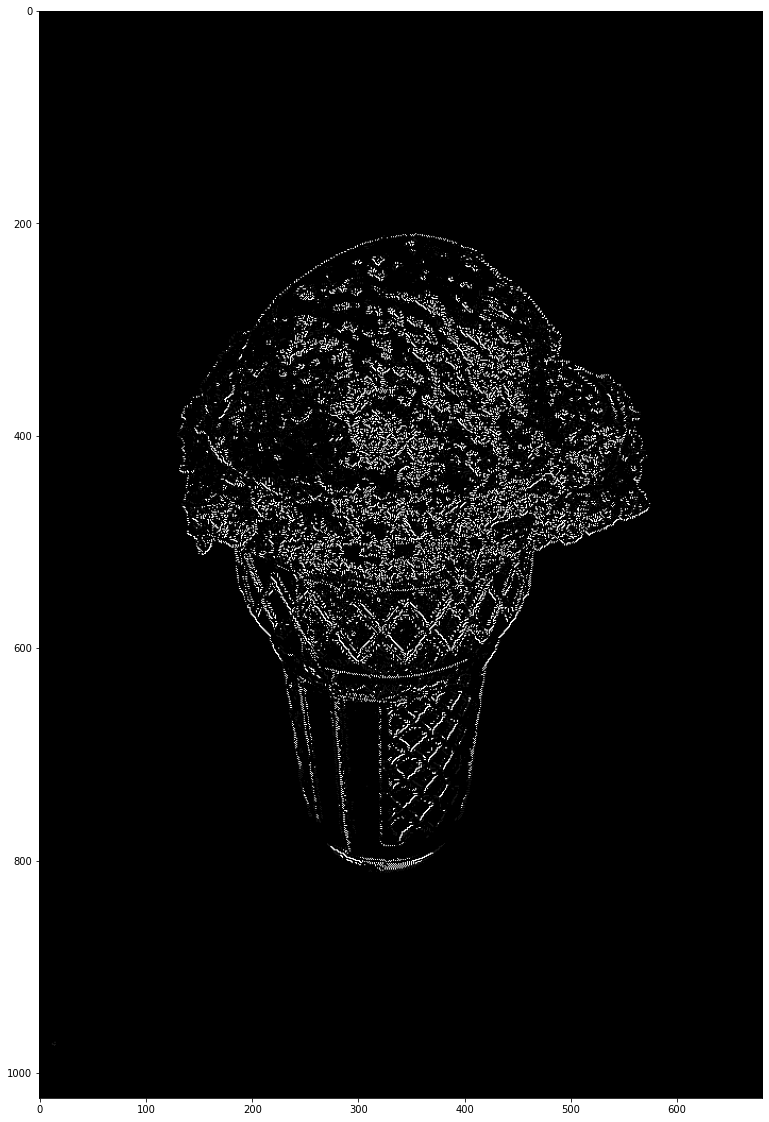

In [233]:
threshed_img = double_threshold(magnitude_map)
plt.figure(figsize=figsize)
plt.imshow(threshed_img,cmap = plt.get_cmap("gray"))

<h3>blob analysis</h3>

In [234]:
#This is pretty much how it goes:
#we have a 2d array containing (strong elements)255's, (weak elements)25's, and (empty elements) zeros
# what we want to do is go through the whole array, and every weak element that is near a
#strong element is immedialty marked as strong (255)
#all other weak elements left are marked as empty

def BFS(node, img, visited):
  row = node[0]
  column = node[1]
  if(visited[row][column] == 1):
    return None

  visited[row][column] = 1
  if(img[row][column] == 25):
    img[row][column] = 255

  if(img[row][column] == 0):
    return None

  for i in range(-1,2):
    for j in range(-1,2):
      try:
        BFS((row+i,column+i), img, visited)
      except:
        pass

def blob(image):
  img = np.ndarray.copy(image)
  strong = [] #list of coordinates of strong elements
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] == 255:
        strong.append((i,j))

  visited = np.zeros(img.shape)

  for element in strong:
    BFS(element, img, visited)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] == 25:
        img[i][j] = 0

  return img

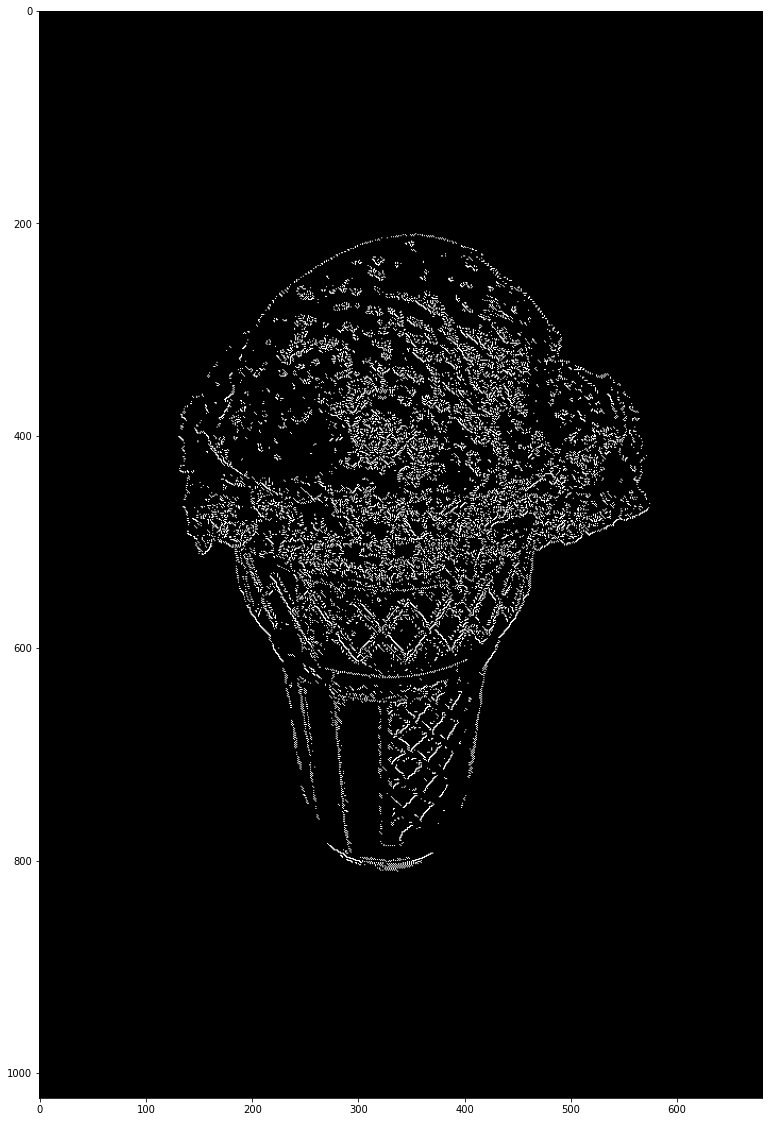

In [235]:
final_img = blob(threshed_img)
plt.figure(figsize=figsize)
plt.imshow(final_img,cmap = plt.get_cmap("gray"))
plt.show()